# Statistical approach for Authorship Prediction of the disputed Federalist Papers

In [1]:
#Import Packages
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [179]:
#sys.path

['',
 'C:\\Users\\gandh\\Downloads\\Datasets\\The Federalist',
 'C:\\Users\\gandh\\Anaconda3\\python36.zip',
 'C:\\Users\\gandh\\Anaconda3\\DLLs',
 'C:\\Users\\gandh\\Anaconda3\\lib',
 'C:\\Users\\gandh\\Anaconda3',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\gandh\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\gandh\\.ipython']

In [4]:
#import script
import federalist

In [5]:
df=federalist.load_federalist_dataset()

In [6]:
df.shape

(85, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
paper_id       85 non-null object
text           85 non-null object
date           85 non-null object
title          85 non-null object
author         85 non-null object
venue          84 non-null object
wordcount      85 non-null object
total_words    85 non-null float64
dtypes: float64(1), object(7)
memory usage: 5.4+ KB


In [8]:
#Drop wordcount result returned from Collections
df.drop(columns='wordcount',axis=1,inplace=True)

In [9]:
#Creating feature called as number of sentences by splitting on "."
df['number_of_sentences']=0

for i in range(0,len(df)):
    #Number of sentences
    df['number_of_sentences'].iloc[i]=len(df['text'].iloc[i].split('.'))
    #Number of words
    #temp=df['text'].iloc[0].replace('.',' ').replace("  "," ").replace("   "," ")
    #len(temp.split(" "))

In [11]:
corpuslist=[]

In [12]:
#ignoring words with length=1 and capturing all unique words from all the essays
for i in range(0,len(df)):
    t=list(set(df['text'].iloc[i].replace("."," ").replace('"',' ').replace("  "," ").split(" ")))
    for word in t:
        if word in corpuslist:
            pass
        elif len(word)<2:
            pass            
        else:
            corpuslist.append(word)
            continue
    

In [13]:
#Creating new features with count of all unique words in each essay written either by hamilton or  madison
%%time
for row in range(0,len(df)):
    for word in corpuslist:
        temp=word+'_count'
        if temp in df.columns:
            pass
        else:
            df[temp]=0
        df[temp].iloc[row]=df['text'].iloc[row].count(word)

In [15]:
%%time
df.shape

Wall time: 0 ns


(85, 8823)

In [16]:
#Removing rows with Author name as 'JAY'
df=df[df['author']!='JAY']

In [17]:
df.shape

(80, 8823)

In [18]:
#Selecting papers that belong to either only Hamilton or only Madison
df2=df[(df.author=='HAMILTON') | (df.author=='MADISON')]

In [19]:
#isolating papers that are disputed
df_test=df[df.author=='HAMILTON OR MADISON']

In [20]:
#df2.groupby('author').sum()['total_words']/df2.groupby('author').sum()['number_of_sentences']

In [21]:
df2.head(1)

,paper_id,text,date,title,author,venue,total_words,number_of_sentences,elevation_count,will_count,...,essays_count,rare_count,rail_count,prostration_count,hee_count,excuse_count,asperities_count,irrevocably_count,organizes_count,bands_count
0,1,to the people of the state of new york after a...,null,General Introduction,HAMILTON,For the Independent Journal,1618.0,51,1,25,...,0,1,0,0,0,0,0,0,0,0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
#Encoding Author as 1s and 0s
df2['author']=le.fit_transform(df2['author'])

In [26]:
df2.head(1)

,paper_id,text,date,title,author,venue,total_words,number_of_sentences,elevation_count,will_count,...,essays_count,rare_count,rail_count,prostration_count,hee_count,excuse_count,asperities_count,irrevocably_count,organizes_count,bands_count
0,1,to the people of the state of new york after a...,null,General Introduction,0,For the Independent Journal,1618.0,51,1,25,...,0,1,0,0,0,0,0,0,0,0


In [27]:
#Seperating Features as X and Target as y
X=df2.iloc[:,6:]
y=df2.iloc[:,4]

In [28]:
#Identifying columns with low variance
max_value_1_columns=[]
for col in X.columns:
    if np.max(X[col])==1:
        max_value_1_columns.append(col)
    else:
        pass

In [29]:
len(max_value_1_columns)

5030

In [30]:
#Dropping columns with low variance
df2.drop(columns=max_value_1_columns,inplace=True,axis=1)

In [31]:
df2.shape

(66, 3793)

In [32]:
df2.head(1)

,paper_id,text,date,title,author,venue,total_words,number_of_sentences,elevation_count,will_count,...,conveying_count,overt_count,habeas_count,corpus_count,extra_count,secretary_count,petition_count,inhabit_count,verbal_count,rare_count
0,1,to the people of the state of new york after a...,null,General Introduction,0,For the Independent Journal,1618.0,51,1,25,...,0,1,0,0,0,0,0,0,0,1


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler=MinMaxScaler()

In [35]:
#Scaling features using MinMax Scaler
X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)

In [36]:
#X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)

In [37]:
import seaborn as sns

In [38]:
#print(X1.head(1),y1.head(1))

In [40]:
y.value_counts()
#15 Papers belong to madison and 51 belong to Hamilton

0    51
1    15
Name: author, dtype: int64

In [41]:
#df2.drop(columns=['date','title','venue','text'],inplace=True)

In [42]:
df2.shape

(66, 3793)

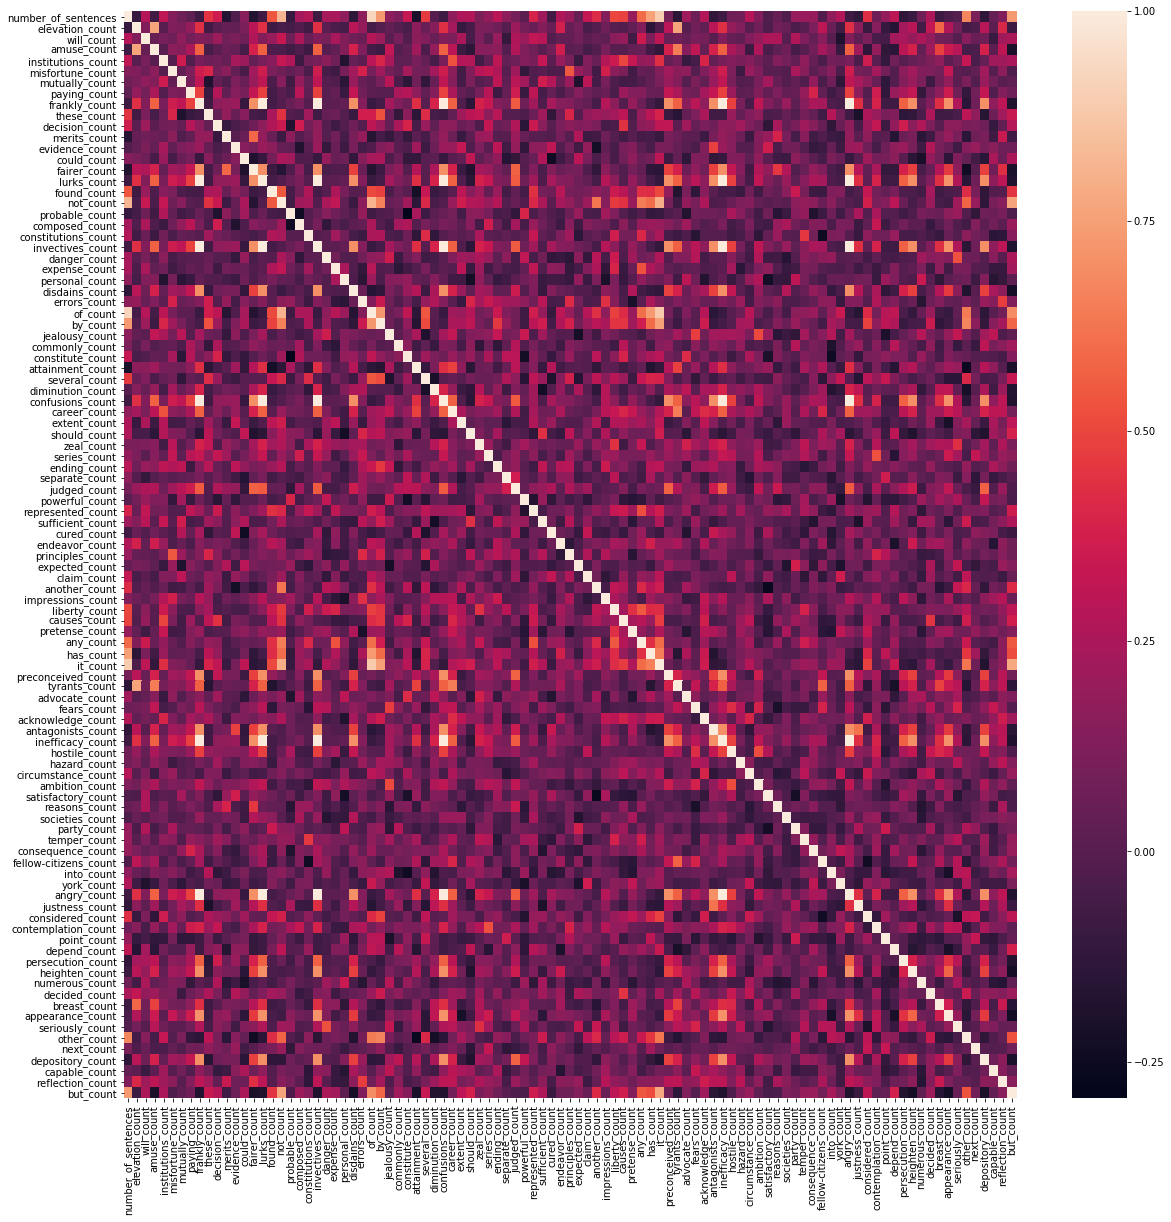

In [43]:
#Creating Correlation heatmap using seaborn for 100 columns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,20)) 


# calculate the correlation matrix
corr = X.iloc[:,1:100].corr()
#Correrelation pairs
#(loudness,reserves),(inefficacy,ardently),(frankly,heresies)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [44]:
corr2=df2.corr()

In [45]:
#Identifying columns that are highly correlated with target variable author
l=[]
for i in range (0,len(corr2['author'])):
    if corr2['author'].iloc[i] > 0.3 or corr2['author'].iloc[i] < -0.3:
        l.append(i)

In [46]:
#del l[0]

In [47]:
dfnew=df2[corr2.iloc[:,l].columns]

In [48]:
#Columns that are highly correlated to target as well asavailable in features set X
temp_col_list=list(set(dfnew.columns) & set(X.columns))

In [49]:
#Reducing number of features
X=X[temp_col_list]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
#Performing train,test split with 20% weightage to test sample
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt=DecisionTreeClassifier(max_depth=4,criterion='gini',random_state=42)

In [55]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [59]:
predictions=dt.predict(X_test)

In [60]:
print("Results from a Decision Tree Classifier are as below \n")
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))
print("\nPrecision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))

Results from a Decision Tree Classifier are as below 

Confusion Matrix : 
 [[9 0]
 [1 4]]

Precision Score :  1.0
Recall Score :  0.8
Accuracy Score :  0.9285714285714286


In [61]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
rf=RandomForestClassifier(n_estimators=5,bootstrap=True,random_state=42)

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [64]:
predictions=rf.predict(X_test)

In [65]:
print("Results from a Random Forest Classifier are as below \n")
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))
print("\nPrecision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))

Results from a Random Forest Classifier are as below 

Confusion Matrix : 
 [[8 1]
 [3 2]]

Precision Score :  0.6666666666666666
Recall Score :  0.4
Accuracy Score :  0.7142857142857143


In [66]:
from sklearn.metrics import precision_recall_curve

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,random_state=42,n_estimators=200)

In [69]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [70]:
predictions=gbc.predict(X_test)

In [71]:
print("Results from a Gradient Boosting Classifier are as below \n")
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))
print("\nPrecision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))

Results from a Gradient Boosting Classifier are as below 

Confusion Matrix : 
 [[9 0]
 [1 4]]

Precision Score :  1.0
Recall Score :  0.8
Accuracy Score :  0.9285714285714286


In [72]:
len(gbc.feature_importances_)

274

Text(0.5,1,'Measure of Feature Importance using Gradient Boosting Classifier with max_dept=5')

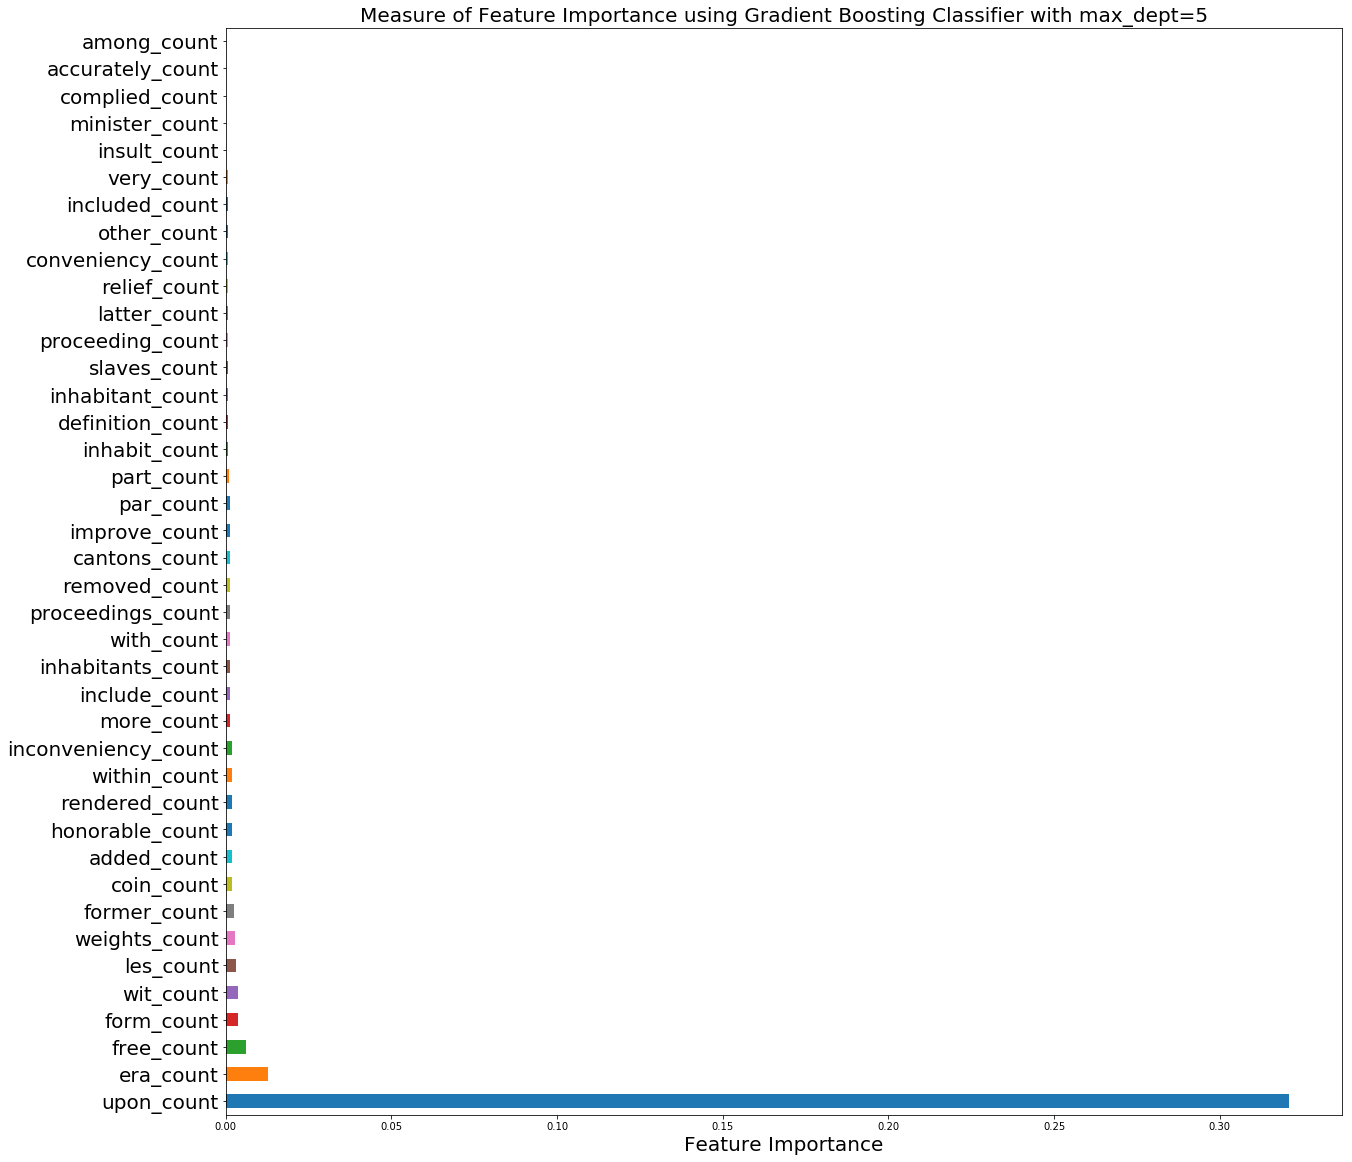

In [74]:
#Selecting Best features used for splitting the nodes using 'gini' criterion
#Referred from Stackoverflow:https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names
plt.figure(figsize=(20,20))
(pd.Series(gbc.feature_importances_, index=X.columns)
   .nlargest(40)
   .plot(kind='barh')) 
plt.xlabel("Feature Importance",fontsize=20)
plt.yticks(fontsize=20)
plt.title("Measure of Feature Importance using Gradient Boosting Classifier with max_dept=5",fontsize=20)

In [75]:
#%matplotlib notebook
%matplotlib inline

Text(0.5,1,"Distribution of 'upon' in all essays")

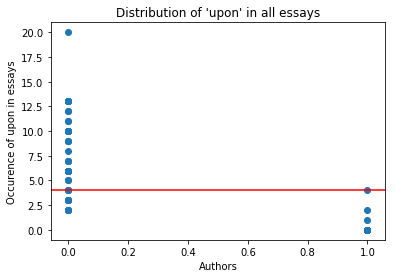

In [77]:
plt.scatter(dfnew['author'],dfnew['upon_count'])
plt.axhline(4,color='r')
plt.xlabel("Authors")
plt.ylabel("Occurence of upon in essays")
plt.title("Distribution of 'upon' in all essays")
#None of the essays written by madison has occurence of Upon more than 4

In [78]:
#plt.scatter(dfnew['author'],dfnew['form_count'])
#plt.scatter(dfnew['author'],dfnew['era_count'])
#plt.scatter(dfnew['era_count'],dfnew['form_count'])
#plt.scatter(dfnew['era_count'],dfnew['upon_count'],marker='+')
#plt.scatter(dfnew['era_count'],dfnew['free_count'],marker='*')

In [79]:
#Selecting 40 best features from Gradient Boosting Classifier
temp_df=pd.DataFrame(data=pd.Series(gbc.feature_importances_, index=X.columns).nlargest(40))

In [80]:
important_cols=list(temp_df.transpose().columns)

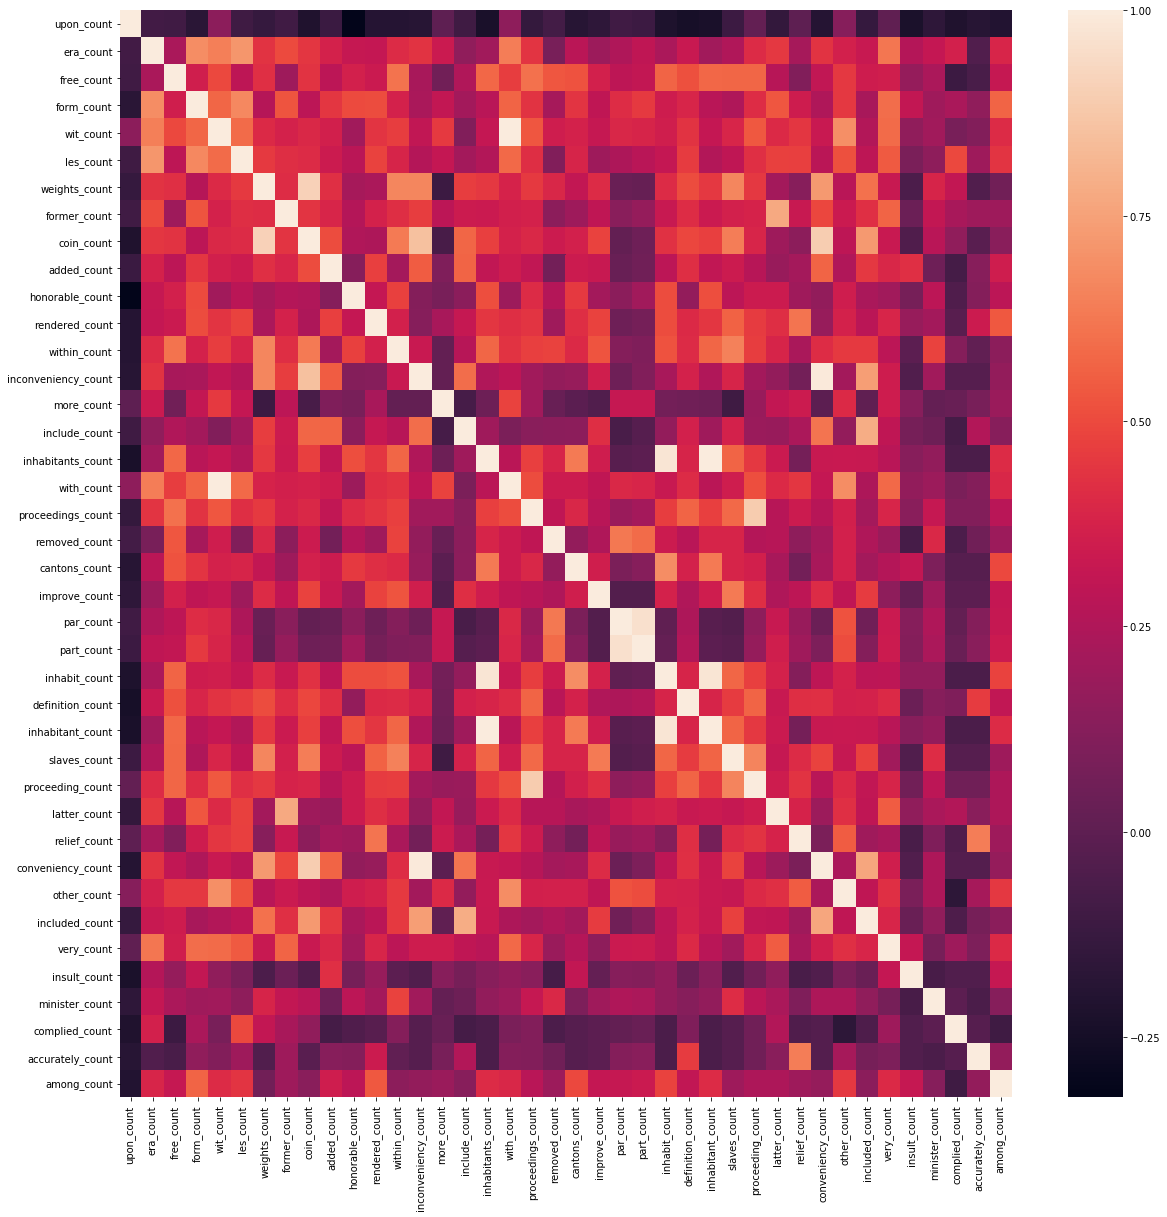

In [81]:
#Correlation heatmap for 40 features
fig, ax = plt.subplots(figsize=(20,20)) 


# calculate the correlation matrix
corr = X[important_cols].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [85]:
#X[important_cols].loc[:,['improvement_count','improve_count']].corr()

In [86]:
X[important_cols].loc[:,['coin_count','inconveniency_count','weights_count']].corr()

,coin_count,inconveniency_count,weights_count
coin_count,1.000000,0.850792,0.907756
inconveniency_count,0.850792,1.000000,0.664823
weights_count,0.907756,0.664823,1.000000


In [87]:
X[important_cols].loc[:,['include_count','included_count']].corr()

,include_count,included_count
include_count,1.000000,0.785266
included_count,0.785266,1.000000


In [89]:
#X[important_cols].loc[:,['canton_count','cantons_count']].corr()

In [90]:
X[important_cols].loc[:,['wit_count','with_count']].corr()

,wit_count,with_count
wit_count,1.000000,0.998015
with_count,0.998015,1.000000


In [92]:
#X[important_cols].loc[:,['inhabit_count','canton_count','cantons_count']].corr()

In [93]:
X[important_cols].loc[:,['wit_count','other_count']].corr()

,wit_count,other_count
wit_count,1.000000,0.693645
other_count,0.693645,1.000000


In [94]:
X[important_cols].loc[:,['former_count','latter_count']].corr()

,former_count,latter_count
former_count,1.000000,0.774421
latter_count,0.774421,1.000000


In [95]:
X['wit_count']=(X['with_count']+X['wit_count'])/2
X['included_count']=(X['include_count']+X['included_count'])/2
X['coin_count']=(X['coin_count']+X['inconveniency_count']+X['weights_count'])/3
X['latter_count']=(X['latter_count']+X['former_count'])/2
#drop columns with,include,inconveniency,weights,former,improvement,cantons,inhabitant

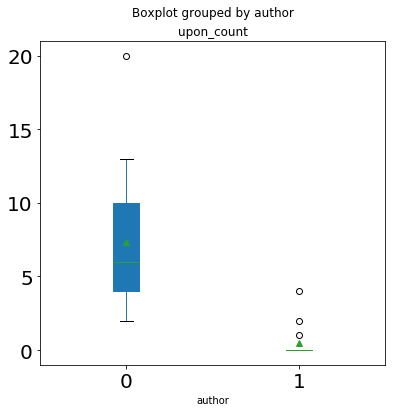

In [96]:
df2.boxplot(column='upon_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

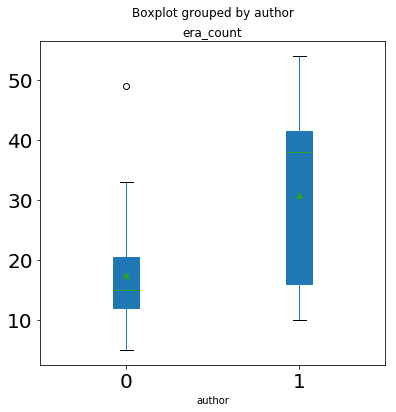

In [97]:
df2.boxplot(column='era_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

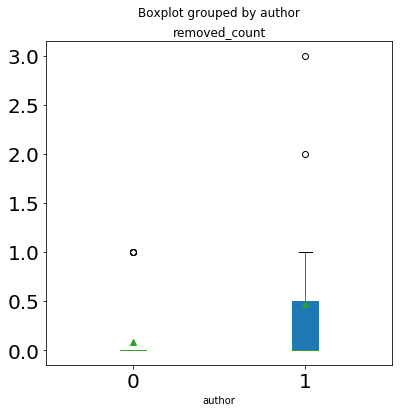

In [98]:
df2.boxplot(column='removed_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

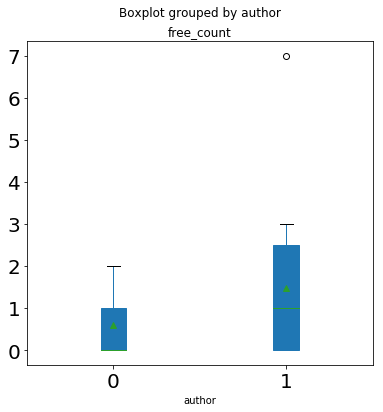

In [99]:
df2.boxplot(column='free_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

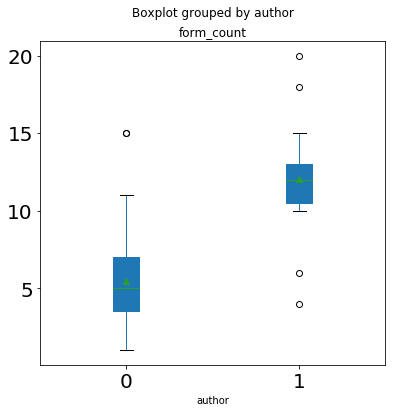

In [100]:
df2.boxplot(column='form_count',by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

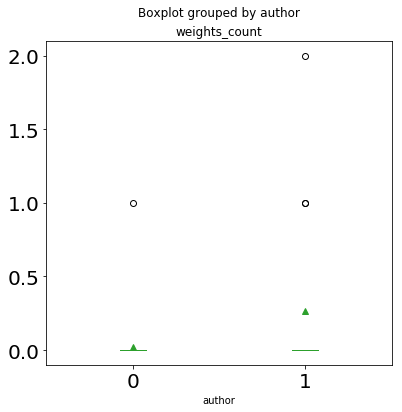

In [101]:
df2.boxplot(column=important_cols[6],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

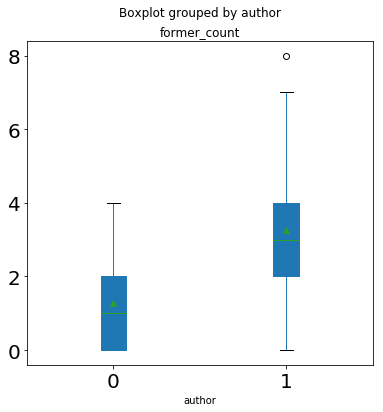

In [102]:
df2.boxplot(column=important_cols[7],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

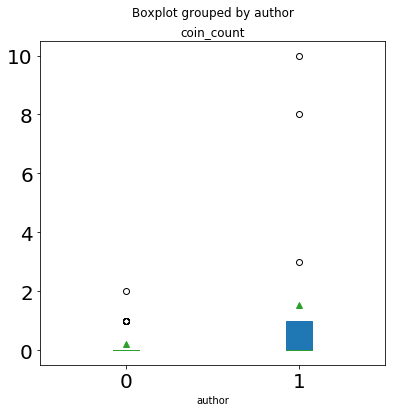

In [103]:
df2.boxplot(column=important_cols[8],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

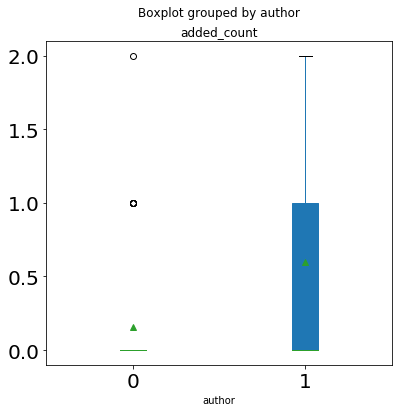

In [104]:
df2.boxplot(column=important_cols[9],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

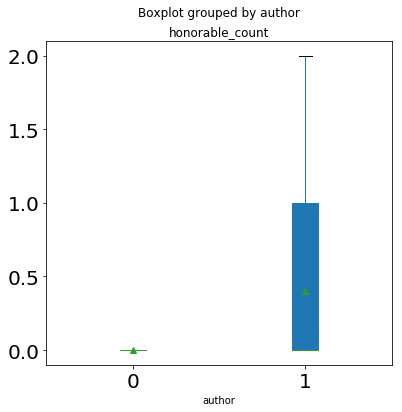

In [105]:
df2.boxplot(column=important_cols[10],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

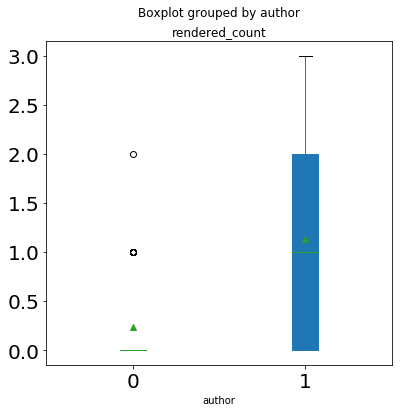

In [106]:
df2.boxplot(column=important_cols[11],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

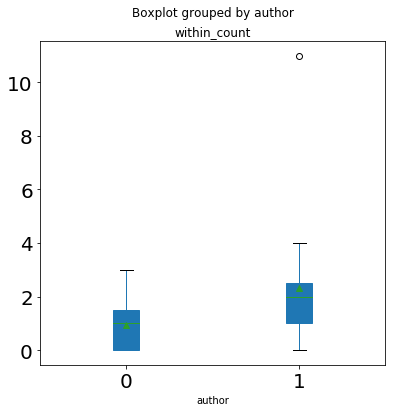

In [107]:
df2.boxplot(column=important_cols[12],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

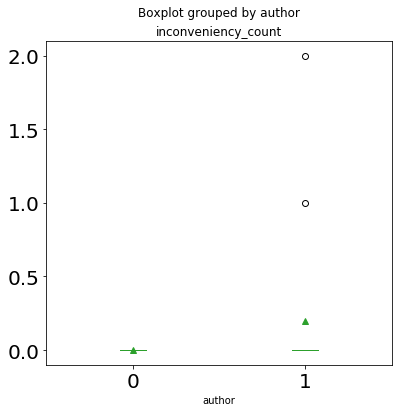

In [108]:
df2.boxplot(column=important_cols[13],by='author',fontsize=20,figsize=(6,6),grid=False,patch_artist=True,showmeans=True)

In [109]:
#Dropping features that were correlated
X.drop(columns=['with_count','include_count','inconveniency_count','weights_count','former_count','improvement_count','cantons_count','inhabitant_count'],axis=1,inplace=True)

In [110]:
newlist=[]
for col in important_cols:
    if col not in X.columns:
        pass
    else:
        newlist.append(col)

In [111]:
X=X[newlist]

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
#ax1.boxplot(data=df2[important_cols[2]],x=df2['author'])

In [114]:
X_test2=pd.DataFrame(data=scaler.fit_transform(df_test.iloc[:,6:]),columns=df_test.iloc[:,6:].columns)[newlist]

In [115]:
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,n_estimators=100,random_state=42)

In [116]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [117]:
predictions=gbc.predict(X_test)

In [118]:
print("Results from a Gradient Boosting Classifier are as below \n")
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))
print("\nPrecision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))

Results from a Gradient Boosting Classifier are as below 

Confusion Matrix : 
 [[9 0]
 [1 4]]

Precision Score :  1.0
Recall Score :  0.8
Accuracy Score :  0.9285714285714286


In [119]:
gbc.predict(X_test2)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
param_grid=[{'n_estimators':[3,10,30,100],'max_features':[2,4,6,8,10]},{'n_estimators':[10,100],'max_features':[2,4,6,8,10]}]
gbc_clf=GradientBoostingClassifier()
grid_search=GridSearchCV(gbc_clf,param_grid,cv=5,scoring='recall')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 10]}, {'n_estimators': [10, 100], 'max_features': [2, 4, 6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [122]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [123]:
grid_search.best_score_

1.0

In [124]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [165]:
gbc=GradientBoostingClassifier(max_features=6,n_estimators=100)

In [166]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [167]:
predictions=gbc.predict(X_test)

In [168]:
print("Results from a Gradient Boosting Classifier are as below \n")
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))
print("\nPrecision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))

Results from a Gradient Boosting Classifier are as below 

Confusion Matrix : 
 [[8 1]
 [2 3]]

Precision Score :  0.75
Recall Score :  0.6
Accuracy Score :  0.7857142857142857


In [169]:
le.inverse_transform(gbc.predict(X_test2))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['MADISON', 'HAMILTON', 'MADISON', 'MADISON', 'MADISON', 'HAMILTON',
       'MADISON', 'MADISON', 'MADISON', 'MADISON', 'MADISON'],
      dtype=object)

In [170]:
dt=DecisionTreeClassifier(max_depth=10)

In [171]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [172]:
predictions=dt.predict(X_test)

In [173]:
print("Results from a Gradient Boosting Classifier are as below \n")
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))
print("\nPrecision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))

Results from a Gradient Boosting Classifier are as below 

Confusion Matrix : 
 [[9 0]
 [1 4]]

Precision Score :  1.0
Recall Score :  0.8
Accuracy Score :  0.9285714285714286


In [174]:
le.inverse_transform(dt.predict(X_test2))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['MADISON', 'HAMILTON', 'MADISON', 'MADISON', 'MADISON', 'HAMILTON',
       'MADISON', 'MADISON', 'MADISON', 'MADISON', 'MADISON'],
      dtype=object)

In [175]:
param_grid=[{'max_features':[2,4,6,8,10]},{'max_depth':[2,4,6,8,10,20]}]
dt_clf=DecisionTreeClassifier()
grid_search=GridSearchCV(dt_clf,param_grid,cv=5,scoring='recall')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_features': [2, 4, 6, 8, 10]}, {'max_depth': [2, 4, 6, 8, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [176]:
grid_search.best_params_

{'max_depth': 4}

In [ ]:
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)
predictions=dt.predict(X_test)
print("Results from a Gradient Boosting Classifier are as below \n")
print("Confusion Matrix : "+"\n",confusion_matrix(y_test,predictions))
print("\nPrecision Score : ",precision_score(y_test,predictions))
print("Recall Score : ",recall_score(y_test,predictions))
print("Accuracy Score : ",accuracy_score(y_test,predictions))


In [177]:
le.inverse_transform(dt.predict(X_test2))

C:\Users\gandh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['MADISON', 'HAMILTON', 'MADISON', 'MADISON', 'MADISON', 'HAMILTON',
       'MADISON', 'MADISON', 'MADISON', 'MADISON', 'MADISON'],
      dtype=object)

In [178]:
df_test

,paper_id,text,date,title,author,venue,total_words,number_of_sentences,elevation_count,will_count,...,essays_count,rare_count,rail_count,prostration_count,hee_count,excuse_count,asperities_count,irrevocably_count,organizes_count,bands_count
48,49,to the people of the state of new york the aut...,"""Tuesday, February 5, 1788",Method of Guarding Against the Encroachments o...,HAMILTON OR MADISON,From the New York Packet,1656.0,58,0,1,...,0,0,0,0,0,0,0,0,0,0
49,50,to the people of the state of new york it may ...,"""Tuesday, February 5, 1788",Periodical Appeals to the People Considered,HAMILTON OR MADISON,From the New York Packet,1113.0,41,0,7,...,0,0,0,0,0,0,0,0,0,0
50,51,to the people of the state of new york to what...,"Friday, February 8, 1788",The Structure of the Government Must Furnish t...,HAMILTON OR MADISON,From the New York Packet,1922.0,60,0,23,...,0,0,0,0,0,0,0,0,0,0
51,52,to the people of the state of new york from th...,"""Friday, February 8, 1788",The House of Representatives,HAMILTON OR MADISON,From the New York Packet,1853.0,63,0,11,...,0,0,0,0,0,0,0,0,0,0
52,53,to the people of the state of new york i shall...,"""Tuesday, February 12, 1788",The Same Subject Continued (The House of Repre...,HAMILTON OR MADISON,From the New York Packet,2181.0,61,0,26,...,0,0,0,0,0,0,0,0,0,0
53,54,to the people of the state of new york the nex...,"""Tuesday, February 12, 1788",The Apportionment of Members Among the States,HAMILTON OR MADISON,From the New York Packet,2009.0,60,0,15,...,0,0,0,0,0,0,0,0,0,0
54,55,to the people of the state of new york the num...,"Friday, February 15, 1788",The Total Number of the House of Representatives,HAMILTON OR MADISON,From the New York Packet,2051.0,55,1,20,...,0,0,0,0,0,0,0,0,0,0
55,56,to the people of the state of new york the sec...,"""Tuesday, February 19, 1788",The Same Subject Continued (The Total Number o...,HAMILTON OR MADISON,From the New York Packet,1578.0,48,0,29,...,0,0,0,0,0,0,0,0,0,0
56,57,to the people of the state of new york the thi...,"Tuesday, February 19, 1788",The Alleged Tendency of the New Plan to Elevat...,HAMILTON OR MADISON,From the New York Packet,2214.0,63,2,24,...,0,0,0,0,0,0,0,0,0,0
61,62,to the people of the state of new york having ...,null,The Senate,HAMILTON OR MADISON,For the Independent Journal,2392.0,82,0,17,...,0,0,0,0,0,0,0,0,0,0
